<a href="https://colab.research.google.com/github/BETANCOURT29/AlejandroBetancourt/blob/main/Semana2/limpieza-pandas/SOLUCION_de_Ejercicio_LimpiezaPandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODELOS PREDICTIVOS PARA SISTEMAS INTELIGENTES

## Ejercicio: Limpieza usando pandas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.pyplot as plt

In [ ]:
# Cargar el dataset DailyDelhiClimateTrain.csv
data = pd.read_csv("DailyDelhiClimateTrain.csv", header = 0)
data.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [ ]:
# Verificar las estadísticas generales del dataset
# Revisar la información, encuentre en los datos máximos y mínimos de las variables
# Revisar si encuentra algo fuera de lo normal
data.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [ ]:
# Eliminar las columnas meantemp, humidity y wind_speed. Mantenga la columna meanpressure
data = data.drop(columns=['meantemp', 'humidity', 'wind_speed'])
data.head()

,date,meanpressure
0,2013-01-01,1015.666667
1,2013-01-02,1017.800000
2,2013-01-03,1018.666667
3,2013-01-04,1017.166667
4,2013-01-05,1016.500000


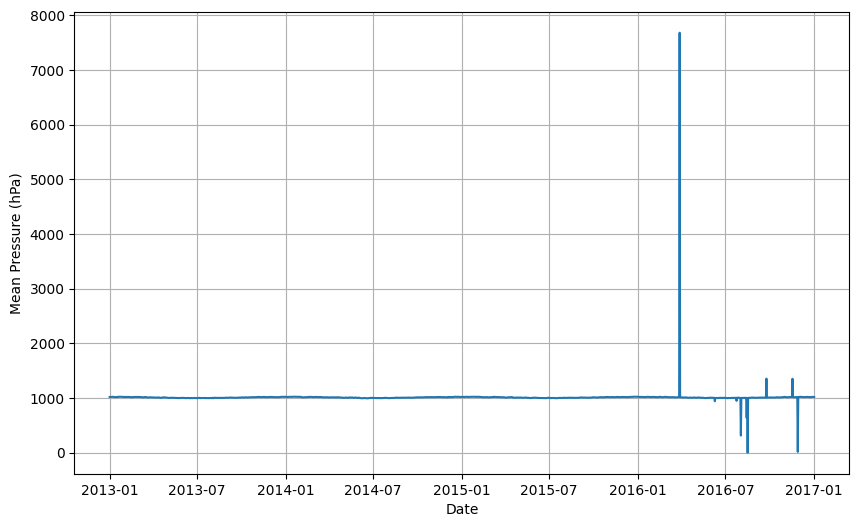

In [ ]:
# Graficar los datos del campo meanpressure
# Qué puede decir de la gráfica?
# Hay algo atípico en esa respuesta temporal?
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

plt.figure(figsize=(10,6))
plt.plot(data['meanpressure'])
plt.xlabel('Date')
plt.ylabel('Mean Pressure (hPa)')
plt.grid(True)
plt.show()

# La gráfica muestra la variación de la presión atmosférica a lo largo del tiempo, se observa un comportamiente constante la mayoria de tiempo.
# Sí, se pueden observar algunos valores atípicos. Se ven algunos valores muy altos y otros mas bajos de lo normal, presiones menores a 900 hPa y mayores a 1100 hPa.


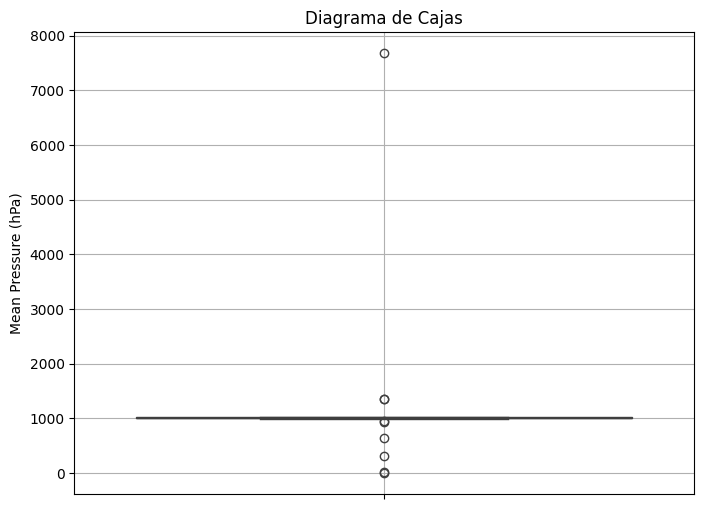

In [ ]:
# Realice un diagrama de cajas y alambres para determinar visualmente si hay outliers
plt.figure(figsize=(8,6))
sns.boxplot(y=data['meanpressure'])
plt.title('Diagrama de Cajas')
plt.ylabel('Mean Pressure (hPa)')
plt.grid(True)
plt.show()

In [ ]:
# Calcular el parámetro Zscore para la columna meanpressure
from scipy import stats

data['zscore_meanpressure'] = stats.zscore(data['meanpressure'])

data[['meanpressure', 'zscore_meanpressure']].head()

,meanpressure,zscore_meanpressure
date,,
2013-01-01,1015.666667,0.025321
2013-01-02,1017.800000,0.037162
2013-01-03,1018.666667,0.041972
2013-01-04,1017.166667,0.033647
2013-01-05,1016.500000,0.029946


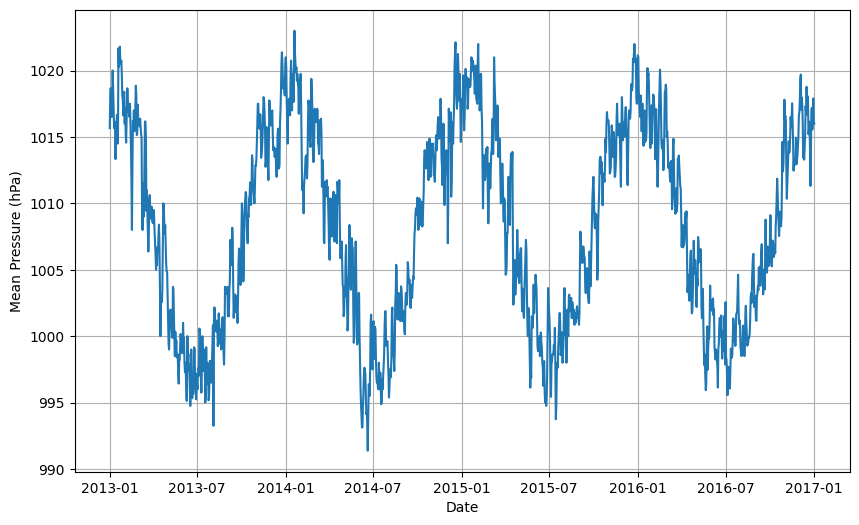

In [71]:
# Variar el valor del humbral de Zscore para filtrar valores atípicos hasta que considere que la gráfica de la variable
#  meanpressure sea correcta
threshold = 0.3

filtered_data = data[(data['zscore_meanpressure'].abs() <= threshold)]

plt.figure(figsize=(10,6))
plt.plot(filtered_data.index, filtered_data['meanpressure'])
plt.xlabel('Date')
plt.ylabel('Mean Pressure (hPa)')
plt.grid(True)
plt.show()

In [63]:
# Para los datos sin outliers verificar nuevamente las estadísticas generales
# Qué puede decir de los valores máximos y mínimos de los datos filtrados
data_stats = filtered_data['meanpressure'].describe()

max_value_filtered = filtered_data['meanpressure'].max()
min_value_filtered = filtered_data['meanpressure'].min()

data_stats, max_value_filtered, min_value_filtered

# El valor maximo ahora esta dentro de los valores tipicos de la presión atmosférica.
# El valor minimo ahora esta tambien en los valores tipicos de la presión atmosférica.

(count    1453.000000
 mean     1008.269018
 std         7.437835
 min       991.375000
 25%      1001.625000
 50%      1008.571429
 75%      1014.937500
 max      1023.000000
 Name: meanpressure, dtype: float64,
 1023.0,
 991.375)

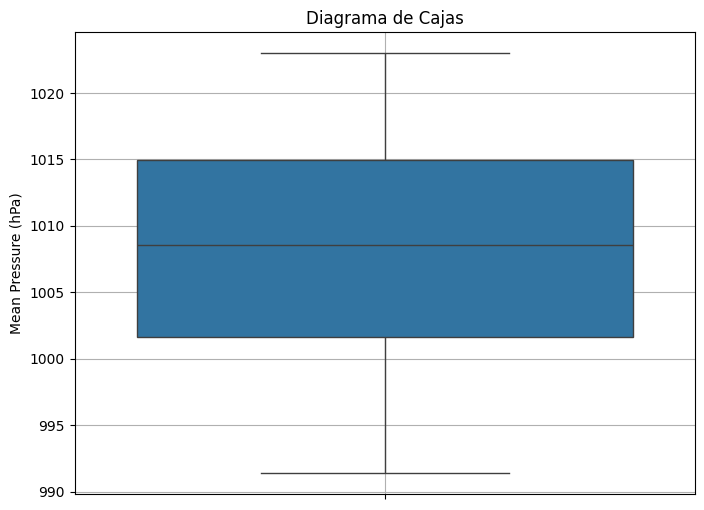

In [69]:
# Realice un diagrama de cajas y alambres para determinar visualmente si aún hay outliers
plt.figure(figsize=(8,6))
sns.boxplot(data=filtered_data, y='meanpressure')
plt.title('Diagrama de Cajas')
plt.ylabel('Mean Pressure (hPa)')
plt.grid(True)
plt.show()